In [1]:
import yaml
import matplotlib.pyplot as plt
%matplotlib inline

with open('../coverage-config.yaml') as f:
    config = yaml.load(f)
    
config

/usr/lib/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


{'beast_jar': 'lib/feast.jar',
 'lsd_executable': 'lsd',
 'n_taxa': 10,
 'sampling_window': 20,
 'sequence_length': 1000,
 'relaxed_clock': False,
 'mutation_rate': 0.001,
 'kappa': 2.0,
 'frequencies': [0.24, 0.26, 0.26, 0.24],
 'rate_sd': None,
 'chain_length': 1000000,
 'log_every': 1000,
 'estimate_clock_rate': False,
 'prior_params': {'clock_rate': {'m': 1.0, 's': 1.25},
  'pop_size': {'m': 2, 's': 0.6},
  'kappa': {'m': 1.0, 's': 1.25}},
 'init_values': {'clock_rate': 1.0, 'pop_size': 10, 'kappa': 2.0},
 'estimate_topology': True,
 'n_iter': 20000,
 'inference': 'mean_field',
 'burn_in': 0.1,
 'n_runs': 10,
 'out_dir': 'out-coverage'}

In [2]:
import pathlib
import pandas as pd

out_dir = pathlib.Path('..') / config['out_dir']
result_df = pd.read_csv(out_dir / 'results.csv')
result_df

,method,quantile,value,variable,seed,truth
0,BEAST,0.025,1.781602,kappa,1,2.000000
1,BEAST,0.975,3.604820,kappa,1,2.000000
2,BEAST,0.025,6.328053,pop_size,1,19.581930
3,BEAST,0.975,19.578576,pop_size,1,19.581930
4,BEAST,0.025,39.052407,tree_height,1,44.658510
5,BEAST,0.975,53.136297,tree_height,1,44.658510
6,Variational,0.025,38.787491,tree_height,1,44.658510
7,Variational,0.975,53.500632,tree_height,1,44.658510
8,Variational,0.025,5.871405,pop_size,1,19.581930
9,Variational,0.975,19.525361,pop_size,1,19.581930


In [3]:
to_use = result_df[result_df.variable.isin(['pop_size', 'tree_height'])]
pivoted = (
    to_use
        .pivot_table('value', ['method', 'variable', 'seed', 'truth'], 'quantile')
        .reset_index()
        .rename(columns={ 0.025 : 'lower', 0.975: 'upper'})
    )
pivoted

quantile,method,variable,seed,truth,lower,upper
0,BEAST,pop_size,1,19.581930,6.328053,19.578576
1,BEAST,pop_size,2,5.754288,3.590819,12.364695
2,BEAST,pop_size,3,21.610452,8.065738,26.083792
3,BEAST,pop_size,4,7.616653,3.745735,13.471675
4,BEAST,pop_size,5,9.628587,6.378834,20.059310
5,BEAST,pop_size,6,6.128376,4.708030,15.210220
6,BEAST,pop_size,7,20.375138,10.493129,30.271187
7,BEAST,pop_size,8,7.804674,3.730493,14.147688
8,BEAST,pop_size,9,7.393972,3.827366,13.289971
9,BEAST,pop_size,10,16.427420,5.751944,18.897444


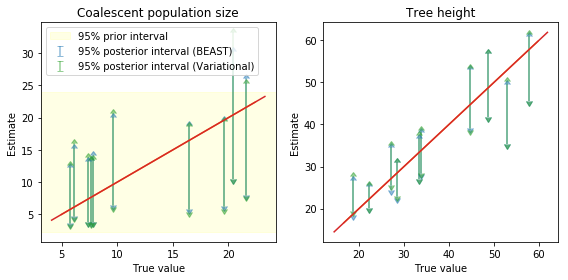

In [49]:
import numpy as np
import scipy.stats
tidy_variable_names = {
    'tree_height': 'Tree height',
    'pop_size': 'Coalescent population size'
}

fig, axs = plt.subplots(ncols=len(pivoted.variable.unique()), figsize=(8, 4))
grouped_variable = pivoted.groupby('variable')
for ax, (variable, var_df) in zip(axs, grouped_variable):
    ax.set_title(tidy_variable_names[variable])
    for method, method_df in var_df.groupby('method'):
        y = (method_df.lower + method_df.upper)/2
        ax.errorbar(method_df.truth,
                    y,
                    (y - method_df.lower, method_df.upper - y),
                    label='95% posterior interval ({0})'.format(method),
                    fmt='none',
                    uplims=True,
                    lolims=True,
                    alpha=0.5)
        ax.plot(list(ax.get_xlim()), list(ax.get_xlim()))
        ax.set_xlabel('True value')
        ax.set_ylabel('Estimate')
    if variable in config['prior_params']:
        prior = scipy.stats.lognorm(scale=np.exp(config['prior_params'][variable]['m']), s=config['prior_params'][variable]['s'])
        ax.axhspan(*prior.ppf([0.025, 0.975]), color='yellow', alpha=0.1, label='95% prior interval')
    
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels, loc='upper left')
plt.tight_layout()
plt.savefig(str(out_dir / 'interval_plot.png'))

In [48]:
with_covered = pivoted.assign(Coverage = (pivoted.truth >= pivoted.lower) & (pivoted.truth <= pivoted.upper))
coverage_df = with_covered.groupby(['method', 'variable']).Coverage.mean().to_frame().reset_index()
coverage_pivoted = coverage_df.pivot(index='method', columns='variable', values='Coverage').reset_index()
coverage_tidy = coverage_pivoted.rename(columns=tidy_variable_names).rename(columns=str.capitalize)
print(coverage_tidy.to_latex(float_format='%.2f', index=False))
coverage_tidy

\begin{tabular}{lrr}
\toprule
      Method &  Coalescent population size &  Tree height \\
\midrule
       BEAST &                        0.90 &         0.90 \\
 Variational &                        0.90 &         0.80 \\
\bottomrule
\end{tabular}



variable,Method,Coalescent population size,Tree height
0,BEAST,0.9,0.9
1,Variational,0.9,0.8
